In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
from torch.autograd import Variable

#Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*4*4, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
    def num_flat_features(self, x):
        #multiply the dimensions except first
        sz = x.size()[1:]
        s = reduce(lambda p, q : p*q, sz)
        #print('s', s)
        return s
    
net = Net()
net

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (256 -> 128)
  (fc2): Linear (128 -> 64)
  (fc3): Linear (64 -> 10)
)

Files already downloaded
Files already downloaded
train size: 60000, 28, 28


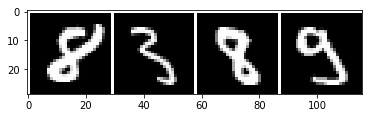

In [6]:
import torch

#MNIST data
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.MNIST(root='./mnist', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./mnist', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=4, num_workers=2)

print('train size: %d, %d, %d' % trainset.train_data.size())

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, padding=1, nrow=4))
#print('labels:', labels)


In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
params = list(net.parameters())
print('len of params: ', len(params))
for k in range(len(params)):
    print('size of ',  k, ' params: ', params[k].size())
    
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        output = net(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
        if i % 2000 == 0:
            print('[%5d %5d] loss: %.3f' % (epoch, i, running_loss/2000))
            #print('conv1 bias grad', list(net.conv1.parameters())[0].grad)
            running_loss = 0
print('Training complete')



('len of params: ', 10)
('size of ', 0, ' params: ', torch.Size([6, 1, 5, 5]))
('size of ', 1, ' params: ', torch.Size([6]))
('size of ', 2, ' params: ', torch.Size([16, 6, 5, 5]))
('size of ', 3, ' params: ', torch.Size([16]))
('size of ', 4, ' params: ', torch.Size([128, 256]))
('size of ', 5, ' params: ', torch.Size([128]))
('size of ', 6, ' params: ', torch.Size([64, 128]))
('size of ', 7, ' params: ', torch.Size([64]))
('size of ', 8, ' params: ', torch.Size([10, 64]))
('size of ', 9, ' params: ', torch.Size([10]))
[    0     0] loss: 0.001
[    0  2000] loss: 1.157
[    0  4000] loss: 0.204
[    0  6000] loss: 0.139
[    0  8000] loss: 0.121
[    0 10000] loss: 0.099
[    0 12000] loss: 0.089
[    0 14000] loss: 0.075
[    1     0] loss: 0.000
[    1  2000] loss: 0.062
[    1  4000] loss: 0.067
[    1  6000] loss: 0.059
[    1  8000] loss: 0.059
[    1 10000] loss: 0.056
[    1 12000] loss: 0.060
[    1 14000] loss: 0.054
Training complete


('Groundtruth:', '    7     2     1     0')
('predicted: ', '    7     2     1     0')


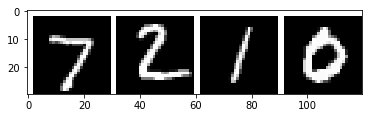

In [7]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Groundtruth:', ' '.join('%5s' % labels[j] for j in range(4)))

outputs = net(Variable(images))

#outputs are the energies for the 10 class indexes
_, predictions = torch.max(outputs.data, 1)
print('predicted: ', ' '.join('%5s' % predictions[j][0] for j in range(4)))


In [8]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy: %d %%  ' % (100 * correct/total) )


Accuracy: 98 %  
